## **Problem Statement**

### **Business Context**

In the dynamic landscape of the media and news industry, the ability to swiftly categorize and curate content has become a strategic imperative. The vast volume of information demands efficient systems to organize and present content to the audience.

The media industry, being the pulse of information dissemination, grapples with the continuous influx of news articles spanning diverse topics. Ensuring that the right articles reach the right audience promptly is not just a logistical necessity but a critical component in retaining and engaging audiences in an age of information overload.

Common Industry Challenges:
Amidst the ceaseless flow of news, organizations encounter challenges such as:
- Information Overload: The sheer volume of news articles makes manual categorization impractical.
- Timeliness: Delays in categorizing news articles can result in outdated or misplaced content.

### **Problem Definition**

E-news Express, a news aggregation startup, faces the challenge of categorizing the news articles collected. With news articles covering sports, busie=ness, politics, and more, the need for an advanced and automated system to categorize them has become increasingly evident. The manual efforts required for categorizing such a diverse range of news articles are substantial, and human errors in the categorization of news articles can lead to reputational damage for the startup. There is also the factor of delays and potential inaccuracies. To streamline and optimize this process, the organization recognizes the imperative of adopting cutting-edge technologies, particularly machine learning, to automate and enhance the categorization of content.

As a data scientist on the E-news Express data team, the task is to analyze the text in news articles and build a model for categorizing them. The goal is to optimize the categorization process, ensuring timely and personalized delivery.

### **Data Dictionary**

- **Article**: The main body of the news article
- **Category**: The category the article belongs to

## **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same. Any mathematical or computational details which are a graded part of the project can be included in the Appendix section of the presentation.

**Note**:
1. Please make sure to use Google Colab for this project.
2. It is recommended to use Colab's free GPU for this project.
    - One can set the Colab runtime to ***T4 GPU*** before starting the project to use the GPU.

## **Installing and Importing Necessary Libraries and Dependencies**

In [ ]:
# Installing the libraries with the specified version.

!pip install tensorflow==2.15.0
!pip install scikit-learn==1.2.2
!pip install seaborn==0.13.1
!pip install matplotlib==3.7.1
!pip install numpy==1.25.2
!pip install pandas==2.0.3
!pip install torch==2.3.0+cu121
!pip install sentence-transformers==2.5.1
!pip install transformers==4.38.2
!pip install bitsandbytes==0.43.0
!pip install accelerate==0.27.2
!pip install sentencepiece==0.2.0 -q --user



  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
!pip show torch

Name: torch
Version: 2.3.0+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, bitsandbytes, fastai, sentence-transformers, torchaudio, torchtext, torchvision


Observation: we have correct version of torch comopatible with google colab

In [ ]:
!pip show sentence-transformers

Name: sentence-transformers
Version: 2.5.1
Summary: Multilingual text embeddings
Home-page: https://www.SBERT.net
Author: Nils Reimers
Author-email: info@nils-reimers.de
License: Apache License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: huggingface-hub, numpy, Pillow, scikit-learn, scipy, torch, tqdm, transformers
Required-by: 


Observation: Correct version of sentence-transfomers are used

**NOTE**: If you encounter an error stating 'library not found,' please restart the kernel (do not disconnect the runtime) and try again.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_colwidth', None)
import torch
from sentence_transformers import SentenceTransformer
from transformers import T5Tokenizer, T5ForConditionalGeneration, pipeline

# To build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# to split the data
from sklearn.model_selection import train_test_split
# to compute performance metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,make_scorer,recall_score,precision_score,f1_score
from sklearn.model_selection import GridSearchCV

# to ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## **Loading the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Complete the code to read the CSV file
data = pd.read_csv('/content/drive/MyDrive/article_data.csv')

## **Data Overview**

In [ ]:
# Write the code to check the first 5 rows of the data
data.head()

,Article,Category
0,"Sudan Govt rejects call to separate religion, state Sudanese rebel leaders #39; demand that Islam be kept out of government in the war-torn region of Darfur, has been rejected by government negotiators.",0
1,Hassan: #39;Abhorrent act #39; says Blair Western political leaders have united to condemn the kidnappers of charity worker Margaret Hassan after a video surfaced apparently showing a militant firing a pistol into the head of a blindfolded woman wearing an orange jumpsuit.,0
2,"Sharon Says Gaza Evacuation Set for 2005 (AP) AP - Israel's evacuation of the Gaza Strip will begin next summer and will take about 12 weeks, Prime Minister Ariel Sharon said Wednesday, reversing an earlier decision to speed up the pullout.",0
3,"Prince Charles chastised for quot;old fashioned quot; views A minister has launched a scathing attack on heir to the throne Prince Charles, accusing him of being quot;very old fashioned quot; and out of touch in his views on teaching in schools.",0
4,"U.S. Says N.Korea Blast Probably Not Nuclear SEOUL (Reuters) - A huge explosion rocked North Korea last week but U.S. and South Korean officials said on Sunday it was unlikely to have been a nuclear weapons test despite the appearance of a ""peculiar cloud"" over the area.",0


5 rows of data are displayed

In [ ]:
# Write the code to check the shape of the data
data.shape


(4000, 2)

In [ ]:
## Complete the code to check the value counts in Category column
data["Category"].value_counts()

Category
0    1000
1    1000
2    1000
3    1000
Name: count, dtype: int64

## **Exploratory Data Analysis (EDA)**


In [ ]:
 # function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Distribution of category

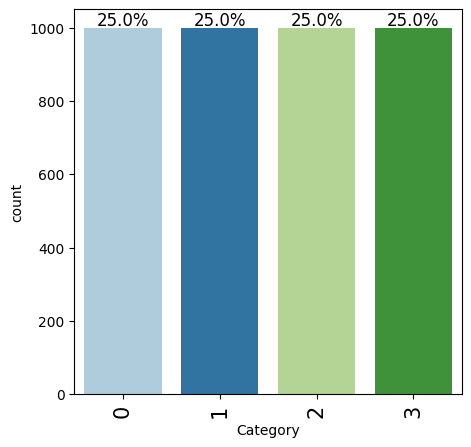

In [ ]:
labeled_barplot(data, "Category", perc=True)   ## Complete the code to get the barplot of Category variable

Observation: That all categories of articles are equally distributed, balanced distribution

## **Model Building - Sentence Transformer + ML**

### Defining the SentenceTransformer Model

he all-MiniLM-L6-v2 model is an all-round (all) model trained on a large and diverse dataset of over 1 billion training samples and generates state-of-the-art sentence embeddings of 384 dimensions.

📊 It is a language model (LM) that has 6 transformer encoder layers (L6) and is a smaller model (Mini) trained to mimic the performance of a larger model (BERT).



In [ ]:
## Defining the model.
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Encoding the data

In [ ]:
# setting the compute device
device = "cuda" if torch.cuda.is_available() else "cpu"

## Encoding the dataset.
embedding_matrix = model.encode(data["Article"],show_progress_bar=True,device=device)

Batches:   0%|          | 0/125 [00:00<?, ?it/s]

In [ ]:
# printing the shape of the embedding matrix
embedding_matrix.shape

(4000, 384)

### Train-Test Split

In [ ]:
# Split the data
X = embedding_matrix
y = data["Category"]

In [ ]:
# Initial split into training (80%) and testing (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=42)

# Further split the temporary set into validation (10%) and test (10%) sets
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

In [ ]:
print("Shape of the set of input variables for training:",X_train.shape)    # Complete the code to get the shape of training input data
print("Shape of the set of input variables for validation:",X_valid.shape)    # Complete the code to get the shape of validation input data
print("Shape of the set of input variables for testing:", X_test.shape)     # Complete the code to get the shape of testing input data

Shape of the set of input variables for training: (3200, 384)
Shape of the set of input variables for validation: (400, 384)
Shape of the set of input variables for testing: (400, 384)


In [ ]:
print("Shape of the set of output variables for training:", y_train.shape)    # Complete the code to get the shape of training output data
print("Shape of the set of output variables for validation:",y_valid.shape)    # Complete the code to get the shape of validation output data
print("Shape of the set of output variables for testing:", y_test.shape)     # Complete the code to get the shape of testing output data

Shape of the set of output variables for training: (3200,)
Shape of the set of output variables for validation: (400,)
Shape of the set of output variables for testing: (400,)


### Random Forest Model (base)

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred,average="weighted")  # to compute Recall
    precision = precision_score(target, pred,average="weighted")  # to compute Precision
    f1 = f1_score(target, pred,average="weighted")  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
## Building the model
rf = RandomForestClassifier(random_state = 42)

## Compete the code to fit the model on X_train and y_train
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

**Confusion Matrix**

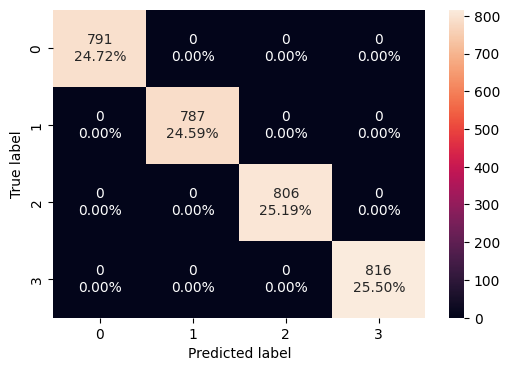

In [ ]:
## To get the confusion matrix on X_train and y_train
confusion_matrix_sklearn(rf, X_train, y_train)

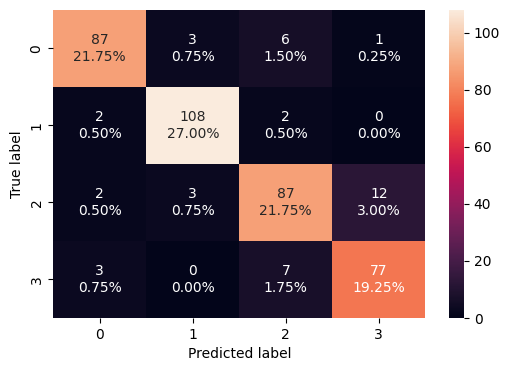

In [ ]:
## Write the code to get the confusion matrix for X_valid and y_valid
confusion_matrix_sklearn(rf, X_valid, y_valid)

In [ ]:
# Predicting on train data
y_pred_train = rf.predict(X_train)

# Predicting on validation data
y_pred_valid = rf.predict(X_valid)

**Classification report**

In [ ]:
## Classification report for train data
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       791
           1       1.00      1.00      1.00       787
           2       1.00      1.00      1.00       806
           3       1.00      1.00      1.00       816

    accuracy                           1.00      3200
   macro avg       1.00      1.00      1.00      3200
weighted avg       1.00      1.00      1.00      3200



In [ ]:
## Write the code to get the classification report for validation data

print(classification_report(y_valid, y_pred_valid))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91        97
           1       0.95      0.96      0.96       112
           2       0.85      0.84      0.84       104
           3       0.86      0.89      0.87        87

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



In [ ]:
## Storing the metrics
rf_train_perf = model_performance_classification_sklearn(
    rf, X_train, y_train
)

In [ ]:
## Storing the metrics
rf_valid_perf = model_performance_classification_sklearn(
    rf, X_valid, y_valid
)

### Random Forest (with class_weights)

In [ ]:
## Building the model
rf_balanced = RandomForestClassifier(class_weight="balanced", random_state=42)

## Complete the code to fit the model on X_train and y_train
rf_balanced.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

**Confusion Matrix**

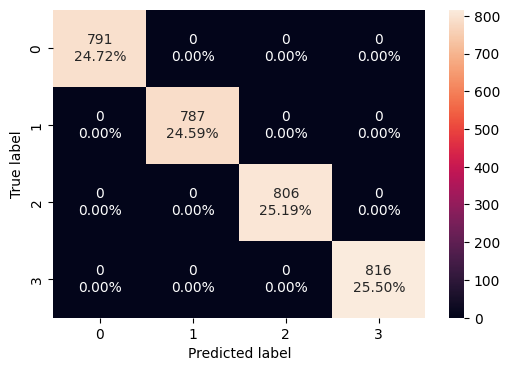

In [ ]:
## To get the confusion matrix on X_train and y_train
confusion_matrix_sklearn(rf_balanced, X_train, y_train)

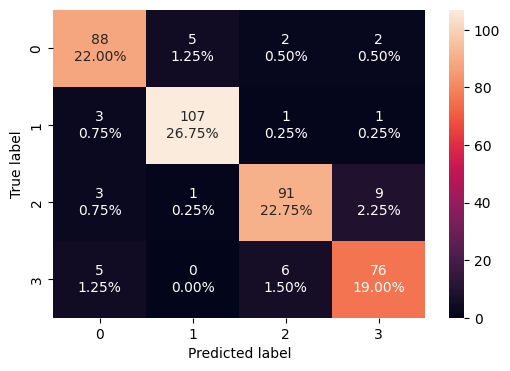

In [ ]:
## Write the code to get the confusion matrix for X_valid and y_valid
confusion_matrix_sklearn(rf_balanced, X_valid, y_valid)

In [ ]:
## Predicting on train data
y_pred_train = rf_balanced.predict(X_train)

## Complete the code to predict the model on X_valid
y_pred_valid = rf_balanced.predict(X_valid)

**Classification report**

In [ ]:
## Classification report for train data
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       791
           1       1.00      1.00      1.00       787
           2       1.00      1.00      1.00       806
           3       1.00      1.00      1.00       816

    accuracy                           1.00      3200
   macro avg       1.00      1.00      1.00      3200
weighted avg       1.00      1.00      1.00      3200



In [ ]:
## Write the code to get the classification report for validation data
print(classification_report(y_valid, y_pred_valid))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        97
           1       0.95      0.96      0.95       112
           2       0.91      0.88      0.89       104
           3       0.86      0.87      0.87        87

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.90       400



In [ ]:
## Storing the metrics
rf_bal_train_perf = model_performance_classification_sklearn(
    rf_balanced, X_train, y_train
)

In [ ]:
## Complete the code to store the metrics of validation data
rf_bal_valid_perf = model_performance_classification_sklearn(
    rf_balanced, X_valid,y_valid
)

### Random Forest (with hyperparamter tuning)

In [ ]:
## Building the model
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import GridSearchCV
rf_tuned = RandomForestClassifier(class_weight="balanced", random_state=42)

## Defining the hyperparameter grid for tuning
parameters = {
    "max_depth": list(np.arange(4, 10, 3)),
    "max_features": ["sqrt", 0.5, 0.7],
    "min_samples_split": [5, 6],
    "n_estimators": np.arange(30, 110, 15),
}

## Defining the type of scoring used to compare parameter combinations
## We need to specify the mechanism of averaging as we have more than 2 target classes
##Weighted average will work for the dataset
scorer = make_scorer(recall_score, average='weighted')

## Running the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=3, n_jobs=-1)

## Complete the code to fit the model on X_train and y_train
grid_obj = grid_obj.fit(X_train,y_train)

In [ ]:
## Creating a new model with the best combination of parameters
rf_tuned = grid_obj.best_estimator_

## Complte the code to fit the new model to X_train and y_train
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7,
                       min_samples_split=6, n_estimators=105, random_state=42)

**Confusion Matrix**

In [ ]:
## Write the code to get the classification report for train data
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       791
           1       1.00      1.00      1.00       787
           2       1.00      1.00      1.00       806
           3       1.00      1.00      1.00       816

    accuracy                           1.00      3200
   macro avg       1.00      1.00      1.00      3200
weighted avg       1.00      1.00      1.00      3200



In [ ]:
## Write the code to get the classification report for validation data
print(classification_report(y_valid, y_pred_valid))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        97
           1       0.95      0.96      0.95       112
           2       0.91      0.88      0.89       104
           3       0.86      0.87      0.87        87

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.90       400



Observation: f1 score are good ( close to 1 for all four categories, Accuracy is also good 91%

In [ ]:
## Complete the code to predict the model on train data
y_pred_train = rf_tuned.predict(X_train)

## Complete the code to predict the model on validation data
y_pred_valid = rf_tuned.predict(X_valid)

**Classification report**

In [ ]:
## Write the code to get the classification report for train data
print(classification_report(y_train, y_pred_train))


              precision    recall  f1-score   support

           0       0.98      0.94      0.96       791
           1       0.97      1.00      0.98       787
           2       0.95      0.95      0.95       806
           3       0.95      0.97      0.96       816

    accuracy                           0.96      3200
   macro avg       0.96      0.96      0.96      3200
weighted avg       0.96      0.96      0.96      3200



Observation:After Randon Forest tuning accuracy and F1 score for all categories have been improved.

In [ ]:
## Write the code to get the classification report for validation data
print(classification_report(y_valid, y_pred_valid))


              precision    recall  f1-score   support

           0       0.92      0.89      0.91        97
           1       0.96      0.97      0.96       112
           2       0.87      0.84      0.85       104
           3       0.82      0.87      0.84        87

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400



In [ ]:
## Complete the code to store the metrics of train data
rf_tuned_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)

In [ ]:
## Complete the code to store the metrics of validation data
rf_tuned_valid_perf = model_performance_classification_sklearn(
    rf_tuned, X_valid,y_valid)


## **Model Building - Transformer**

### Target Mapping

In [ ]:
class_map = {0:"World",1:"Sports",2:"Business",3:"Sci/Tech"}

In [ ]:
class_map

{0: 'World', 1: 'Sports', 2: 'Business', 3: 'Sci/Tech'}

All the model category class have been properly indetified

In [ ]:
reverse_class_map = {}
for key,value in class_map.items():
    reverse_class_map[value]=key

reverse_class_map

{'World': 0, 'Sports': 1, 'Business': 2, 'Sci/Tech': 3}

### Defining the Tokenizer

In [ ]:
## Initializing a T5 tokenizer using the pre-trained model
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-large")

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


### Defining the Model

In [ ]:
## Initializing a T5 model for conditional generation using the pre-trained model "google/flan-t5-large"

# uncomment and use the following line in case GPU is not available
# model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-large", device_map="auto")

# uncomment and use the following line in case GPU is available
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-large", device_map="auto", load_in_8bit=True)

config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

flan-t5-large is well used NLP model (https://huggingface.co/google/flan-t5-base#model-details

### Functions for making predictions

In [ ]:
## Defining a function to compute different metrics.

def model_performance_classification(pred, target):
    """
    Function to compute different metrics to check classification model performance

    pred : prediction of the target variable.
    target: dependent variable
    """


    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred,average="weighted")  # to compute Recall
    precision = precision_score(target, pred,average="weighted")  # to compute Precision
    f1 = f1_score(target, pred,average="weighted")  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
## Creating a function to plot the confusion matrix
def plot_confusion_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (5, 4))
    label_list = ['World','Sports','Business','Sci/Tech']
    sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = label_list, yticklabels = label_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
# defining a function to generate, process, and return a response
def generate_response(prompt):
    # uncomment and use the following line in case GPU is not available
    # input_ids = tokenizer(prompt, return_tensors="pt").input_ids    ### using the tokenizer to create tokens in tensor format from an input

    # uncomment and use the following line in case GPU is available
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to("cuda")    ### using the tokenizer to create tokens in tensor format from an input

    outputs = model.generate(input_ids, max_length=16, do_sample=True, temperature=0.001)    ### generating the model output in tensor format
    return tokenizer.decode(outputs[0])[6:-4]    ### using the tokenizer to decode the model output, and then return it

### Base Prompt for Prediction

In [ ]:
## Selecting and assigning specific columns
X_train = data.iloc[y_train.index]["Article"]
X_valid = data.iloc[y_test.index]["Article"]
X_test = data.loc[y_valid.index]["Article"]

In [ ]:
## Defining a prompt which tells the model what to do
sys_prompt = """
    Classify the folloiwng article into one of these categories: Sports, Business, world
    or Sci-Tech

"""
#0=World,1=Sports,2=Business,3=Sci/Tech
## Predicting the category using the model by incorporating the system prompt and the provided review text

pred_sent = generate_response(
    """
        {}
        news article: '{}'
    """.format(sys_prompt, X_train[4])
)

print(pred_sent)

world


In [ ]:
print(X_train[4])

U.S. Says N.Korea Blast Probably Not Nuclear  SEOUL (Reuters) - A huge explosion rocked North Korea last  week but U.S. and South Korean officials said on Sunday it was  unlikely to have been a nuclear weapons test despite the  appearance of a "peculiar cloud" over the area.


Observation: Predicted response was correct on the prediction

In [ ]:
## Defining a function to generate a sentiment prediction
def predict_category(news_article):
    pred = generate_response(
        """
            {}
            news article: '{}'
        """.format(sys_prompt,news_article)
    )

    if "Sports" in pred:
       pred="Sports"
    elif "Business" in pred:
       pred="Business"
    elif "World" in pred:
       pred="World"
    else:
      pred="Sci/Tech"

    return reverse_class_map[pred]

In [ ]:
## Applying predict_category function on the train data
y_pred_train_flan = X_train.apply(predict_category)

In [ ]:
## Applying predict_category function on the validation data
y_pred_valid_flan = X_valid.apply(predict_category)

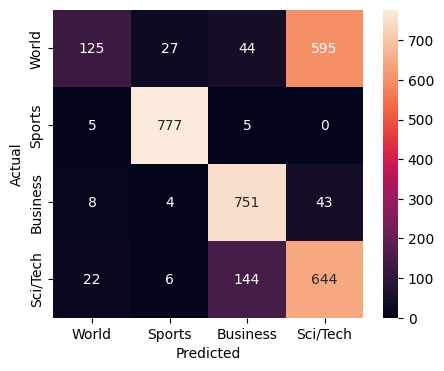

In [ ]:
## Plotting the confusion matrix
plot_confusion_matrix(y_train, y_pred_train_flan)

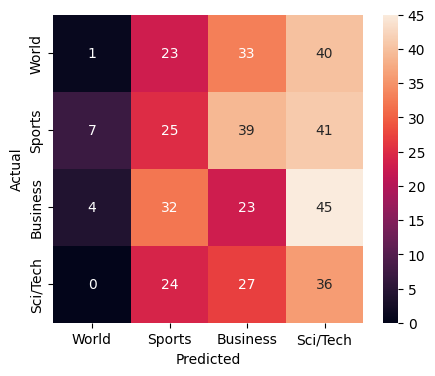

In [ ]:
## Complete the code to get the confusion matrix for validation data
plot_confusion_matrix(y_valid, y_pred_valid_flan)

In [ ]:
## Getting the classification report for train data
print(classification_report(y_train, y_pred_train_flan))

              precision    recall  f1-score   support

           0       0.78      0.16      0.26       791
           1       0.95      0.99      0.97       787
           2       0.80      0.93      0.86       806
           3       0.50      0.79      0.61       816

    accuracy                           0.72      3200
   macro avg       0.76      0.72      0.68      3200
weighted avg       0.76      0.72      0.68      3200



Observation :Category of 1 f1 score are very low, Category 1 and category 2 f1 score are good, Category 3 f1 score is average. Overall Accuracy is 72% (Traiing data)

In [ ]:
## Complete the code to get the classification report for validation data
print(classification_report(y_valid,y_pred_valid_flan))

              precision    recall  f1-score   support

           0       0.08      0.01      0.02        97
           1       0.24      0.22      0.23       112
           2       0.19      0.22      0.20       104
           3       0.22      0.41      0.29        87

    accuracy                           0.21       400
   macro avg       0.18      0.22      0.19       400
weighted avg       0.18      0.21      0.19       400



Observation :Category of 1 f1  score are very low, all categories f1 scores are not good and overall accuracy is 21 %( validation data)

In [ ]:
## Storing the metrics
flan_train_base = model_performance_classification(y_pred_train_flan,y_train)
flan_valid_base = model_performance_classification(y_pred_valid_flan,y_valid)

### Improved Prompt for Prediction

In [ ]:
# defining a prompt which tells the model what to do
sys_prompt = """
    You are a classifier that categorizes articles into one of these
    categories: Sports, Business, World or Sci-Tech.
    Based on the content of the article, determine the most appropriate category.

    Here are some examples:
    1.Article: "The local football team played extremely well in last three matches."
      Category: Sports
    2.Article: "Qualcomm Stock Is Up forty percent as Auto Business Surge."
      Category: Business
    3.Article: "The Indian continent experinced an average temperature rise in summer."
      Category: World
    4.Article: "Apple has released a macbook pro with M3 chips."
      Category: Sci_Tech

    <This prompt will be an improved version of the previous prompt to improve model performance>
"""

# predicting the sentiment using the model by incorporating the system prompt and the provided review text

pred_sent = generate_response(
    """
        {}
        news article: '{}'
    """.format(sys_prompt, X[4])
)

print(pred_sent)

Business


In [ ]:
## Applying predict_category function on the train data
y_pred_train_flan_imp = X_train.apply(predict_category)

In [ ]:
## Applying predict_category function on the validation data
y_pred_valid_flan_imp = X_valid.apply(predict_category)

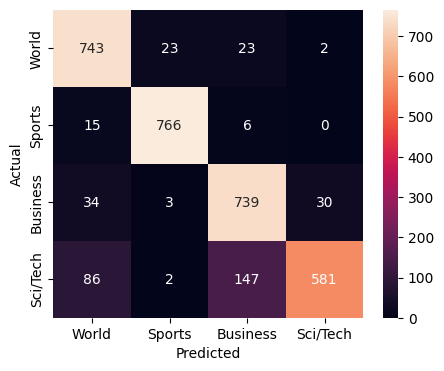

In [ ]:
## Plotting the confusion matrix for train data
plot_confusion_matrix(y_train, y_pred_train_flan_imp)

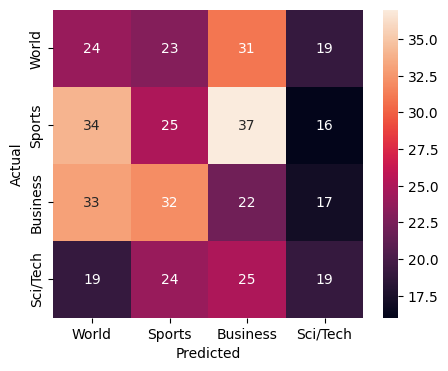

In [ ]:
## Complete the codet to get the confusion matrix for validation data
plot_confusion_matrix(y_valid,y_pred_valid_flan_imp)

In [ ]:
## Getting the classification report for train data
print(classification_report(y_train, y_pred_train_flan_imp))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       791
           1       0.96      0.97      0.97       787
           2       0.81      0.92      0.86       806
           3       0.95      0.71      0.81       816

    accuracy                           0.88      3200
   macro avg       0.89      0.89      0.88      3200
weighted avg       0.89      0.88      0.88      3200



In [ ]:
## Complete the code to get the classification report for validation data
print(classification_report(y_valid,y_pred_valid_flan_imp))

              precision    recall  f1-score   support

           0       0.22      0.25      0.23        97
           1       0.24      0.22      0.23       112
           2       0.19      0.21      0.20       104
           3       0.27      0.22      0.24        87

    accuracy                           0.23       400
   macro avg       0.23      0.23      0.23       400
weighted avg       0.23      0.23      0.23       400



In [ ]:
## Storing the metrics
flan_train_imp = model_performance_classification(y_pred_train_flan_imp,y_train)
flan_valid_imp = model_performance_classification(y_pred_valid_flan_imp,y_valid)

## **Model Performance Comparison and Final Model Selection**

In [ ]:
## Training performance comparison

models_train_comp_df = pd.concat(
    [
        rf_train_perf.T,
        rf_bal_train_perf.T,
        rf_tuned_train_perf.T,
        flan_train_base.T,
        flan_train_imp.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Random Forest(base)",
    "Random Forest with class_weights",
    "Random Forest(tuned)",
    "Flan (base prompt)",
    "Flan (improvised prompt)"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Random Forest(base),Random Forest with class_weights,Random Forest(tuned),Flan (base prompt),Flan (improvised prompt)
Accuracy,1.0,1.0,0.964063,0.717812,0.884062
Recall,1.0,1.0,0.964063,0.717812,0.884062
Precision,1.0,1.0,0.964217,0.756350,0.891560
F1,1.0,1.0,0.963989,0.676428,0.882065


Observation: Accuracy and F1 score improved with improvised prompt than base prompt.

In [ ]:
## Validation set performance comparison
models_valid_comp_df = pd.concat(
    [
        rf_valid_perf.T,
        rf_bal_valid_perf.T,
        rf_tuned_valid_perf.T,
        flan_valid_base.T,
        flan_valid_imp.T
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Random Forest(base)",
    "Random Forest with class_weights",
    "Random Forest(tuned)",
    "Flan (base prompt)",
    "Flan (improvised prompt)"
]
print("Validation set performance comparison:")
models_valid_comp_df

Validation set performance comparison:


,Random Forest(base),Random Forest with class_weights,Random Forest(tuned),Flan (base prompt),Flan (improvised prompt)
Accuracy,0.897500,0.905000,0.895000,0.212500,0.225000
Recall,0.897500,0.905000,0.895000,0.212500,0.225000
Precision,0.897553,0.905129,0.895909,0.184866,0.228160
F1,0.897376,0.904941,0.895046,0.185076,0.225594


**Pick the best model from the above table and apply on test data**

**Observation: The dataset is balanced Looking at the accuracy and F1 score "Random Forest with class_weights" seems to be the best model to choose**

In [ ]:
## Assigns test rows based on index
X_test = embedding_matrix[y_test.index]

Used Random Forest with class_weights (rf_balanced) to get the confusiion matrix

None


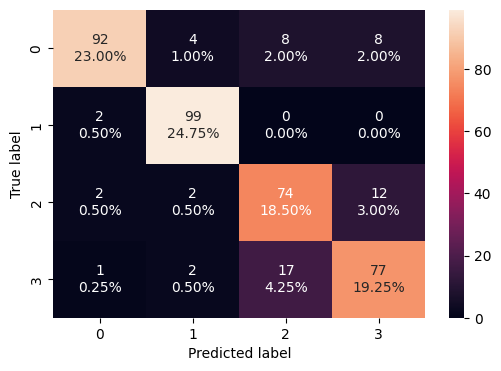

In [ ]:
print(confusion_matrix_sklearn(rf_balanced, X_test, y_test))

In [ ]:
# Predicting on test data
#Random Forest with class_weights is rf_balanced
y_pred_test = rf_balanced.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88       112
           1       0.93      0.98      0.95       101
           2       0.75      0.82      0.78        90
           3       0.79      0.79      0.79        97

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.86      0.85      0.86       400



## **Actionable Insights and Recommendations**

used the all-MiniLM-L6-v2 model to do Prediction of Category of Articles(clustering)

all-MiniLM-L6-v2 is  sentence-transformers model: It maps sentences & paragraphs to a 384 dimensional dense vector space and can be used for tasks like clustering or semantic search.

encoded the dataset using the model to generate embeddings of 384 dimensions.

divied the data set with 80% Training and 20% Test.

tested predictions using these ML model coupled with Sentence transfomers
ML models:
"Random Forest(base)", "Random Forest with class_weights", "Random Forest with Hypertermeter tuning

Confusion matrix and classification report for all these models are reported in the notebook code   
   

used the Google FLAN-T5 model (Transformer) to predict categorization of articles.

**Tasks done with Flan (base Prompt)**
created a function that would take the input data, tokenize it, pass the tokenized data to the model for predictions, process the model output, and then return a response.
defined a prompt to tell the model what exactly it has to do **"Flan (base prompt)**
made predictions with the model using the function and the prompt.

**Tasks done with Flan (Improvised Prompt)**
All the tasks ran for Flan(base prompt) are repated with improvised prompt. System prompt was more detailed and elaboate.

**Validattion_set_performance_comparison**
Compared the models built and apply the best model on the test data

Random Forest with class_weights is chosen to be best model for better accuracy and f1 score.

**Issues Faced:**
1.Applying predict_category function on the training data data using transformers is a really time consuming pattern and it took nearly 40 minutes
2. Any time if the google colab disconnects , I have to run the code again from the start. Huge time loss.
3.flan with improvised prompt has a limitation of 512 tokens and that restricts the prompt


-





---

